# Artificial Neural Network template

## ======= Import the data set ========

In [85]:
import pandas as pd
dataset = pd.read_csv('Churn_Modelling.csv')
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

## ======= Categorical Data =========

In [86]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
print ('Gender:', set(x[:,2]), '\nCountry:', set(x[:,1]))
label_encoder = LabelEncoder()
x[:, 2] = label_encoder.fit_transform(x[:, 2]) #Female:0, Male:1
x[:, 1] = label_encoder.fit_transform(x[:, 1]) 
one_hot_encoder = OneHotEncoder(categorical_features = [1])
x = one_hot_encoder.fit_transform(x).toarray() #France:100, Spain:001, Germany:010
x = x[:, 1:]

Gender: {'Female', 'Male'} 
Country: {'Germany', 'Spain', 'France'}


/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


## ======= Splitting the dataset ========

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## ========= Feature Scaling ========

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## ======= Construct the ANN ========

In [89]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

def build_classifier(_optimizer):
    ### ======== Initializing the ANN ======
    classifier = Sequential()
    
    ### ======== add the input layer and the hidden layers and output layer =====
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim = x_train.shape[1])) #1st
    #classifier.add(Dropout(p=0.1)) #dealwith overfitting
    
    classifier.add(Dense(units=6, kernel_initializer='uniform', activation='relu')) #2nd
    #classifier.add(Dropout(p=0.1)) #dealwith overfitting
    
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #output
    
    ### ======= Compiling the ANN ========
    classifier.compile(optimizer=_optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

## ======== Applying Grid Search to find the best model and the best parameters ========

In [90]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
classifier = KerasClassifier(build_fn=build_classifier)
parameters = [{'batch_size': [10, 20],
              'epochs': [20, 40], 
              '_optimizer': ['adam']}] #try 'rmsprop' or other values with capable machines.
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs=-1) 
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print('The best accuracy:', best_accuracy)
print('The best parameters:', best_parameters)

Epoch 1/20
8000/8000 [==============================] - 2s 276us/step - loss: 0.5185 - acc: 0.7955
Epoch 2/20
8000/8000 [==============================] - 1s 153us/step - loss: 0.4311 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 1s 152us/step - loss: 0.4254 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 1s 166us/step - loss: 0.4219 - acc: 0.7969
Epoch 5/20
8000/8000 [==============================] - 1s 155us/step - loss: 0.4189 - acc: 0.8198
Epoch 6/20
8000/8000 [==============================] - 1s 152us/step - loss: 0.4171 - acc: 0.8244
Epoch 7/20
8000/8000 [==============================] - 1s 151us/step - loss: 0.4155 - acc: 0.8278
Epoch 8/20
8000/8000 [==============================] - 1s 152us/step - loss: 0.4141 - acc: 0.8285
Epoch 9/20
8000/8000 [==============================] - 1s 151us/step - loss: 0.4128 - acc: 0.8315
Epoch 10/20
8000/8000 [==============================] - 1s 173us/step - loss: 0.4123 - acc: 0.8310
Epoch 11/

## ========= Applying the K-Fold cross validation ======

In [95]:
from sklearn.model_selection import cross_val_score
classifier = KerasClassifier(build_fn = build_classifier, _optimizer = 'adam', batch_size = 20, epochs = 20)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10, n_jobs = -1)
print ('The averaged accuracy is %f, and\nstd is %f.\n'%(accuracies.mean(), accuracies.std()))

The averaged accuracy is 0.836500, and
std is 0.011289.



## ====== Predict and make confusion matrix =======

In [96]:
classifier.fit(x_train, y_train)
y_pred_train = classifier.predict(x_train)
#y_pred_train = (y_pred_train > 0.5)
y_pred_test = classifier.predict(x_test)
#y_pred_test = (y_pred_test > 0.5)

Epoch 1/20
8000/8000 [==============================] - 4s 523us/step - loss: 0.5253 - acc: 0.7950
Epoch 2/20
8000/8000 [==============================] - 1s 171us/step - loss: 0.4311 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 2s 193us/step - loss: 0.4267 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 2s 220us/step - loss: 0.4234 - acc: 0.7960
Epoch 5/20
8000/8000 [==============================] - 1s 157us/step - loss: 0.4205 - acc: 0.8041
Epoch 6/20
8000/8000 [==============================] - 1s 160us/step - loss: 0.4182 - acc: 0.8219
Epoch 7/20
8000/8000 [==============================] - 1s 162us/step - loss: 0.4167 - acc: 0.8248
Epoch 8/20
8000/8000 [==============================] - 1s 171us/step - loss: 0.4151 - acc: 0.8274
Epoch 9/20
8000/8000 [==============================] - 2s 191us/step - loss: 0.4138 - acc: 0.8281
Epoch 10/20
8000/8000 [==============================] - 2s 205us/step - loss: 0.4128 - acc: 0.8306
Epoch 11/

In [97]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test, labels=[0, 1]) #lables indicate the order of the results
print ('The accuracy for the training set is %f.\n'%((cm_train[0][0]+cm_train[1][1])/(x_train.shape[0])))
print ('The accuracy for the test set is %f.\n'%((cm_test[0][0]+cm_test[1][1])/(sum(sum(cm_test)))))

The accuracy for the training set is 0.834375.

The accuracy for the test set is 0.838000.



## ======== Predicting a single new observation ========

"""Predict if the customer with the following informations will leave the bank:
Geography: France
Credit Score: 600
Gender: Male
Age: 40
Tenure: 3
Balance: 60000
Number of Products: 2
Has Credit Card: Yes
Is Active Member: Yes
Estimated Salary: 50000"""

In [98]:
import numpy as np
new_pred = classifier.predict(sc.transform(np.array([[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])))
print ('Exited?', new_pred[0, 0])

Exited? 0


/Users/LianshuiZhao/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


## ======== Visualize the train loss =========

In [102]:
classifier = build_classifier('adam')
history = classifier.fit(x_train, y_train, batch_size= 20, epochs=20, validation_data=(x_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 4s 460us/step - loss: 0.5356 - acc: 0.7959 - val_loss: 0.4350 - val_acc: 0.7975
Epoch 2/20
8000/8000 [==============================] - 1s 181us/step - loss: 0.4315 - acc: 0.7960 - val_loss: 0.4284 - val_acc: 0.7975
Epoch 3/20
8000/8000 [==============================] - 1s 180us/step - loss: 0.4271 - acc: 0.7960 - val_loss: 0.4239 - val_acc: 0.7975
Epoch 4/20
8000/8000 [==============================] - 1s 180us/step - loss: 0.4239 - acc: 0.7960 - val_loss: 0.4208 - val_acc: 0.7975
Epoch 5/20
8000/8000 [==============================] - 2s 213us/step - loss: 0.4211 - acc: 0.7960 - val_loss: 0.4189 - val_acc: 0.7975
Epoch 6/20
8000/8000 [==============================] - 1s 185us/step - loss: 0.4189 - acc: 0.8191 - val_loss: 0.4166 - val_acc: 0.8265
Epoch 7/20
8000/8000 [==============================] - 1s 187us/step - loss: 0.4176 - acc: 0.8226 - val_loss: 0.4150 - val_acc: 0.8330


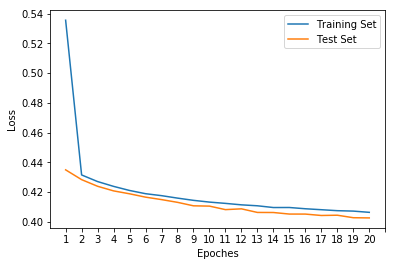

In [111]:
import matplotlib.pyplot as plt
import numpy as np
num_echoches = len(history.history['loss'])
plt.plot (history.history['loss'], label = 'Training Set')
plt.plot (history.history['val_loss'], label = 'Test Set')
plt.xticks(np.arange(0, 1+num_echoches), labels = [str(i+1) for i in range(num_echoches)])
plt.ylabel('Loss')
plt.xlabel('Epoches')
plt.legend()
plt.show()